В этом занятии:

* Познакомимся с полиномиальной регрессией поближе.

* Разберем техники улучшения моделей машинного обучения с помощью Lasso и Ridge регрессий.

* Вспомним, зачем нужна нормализация данных.

* [Бонус] Узнаем, что такое Elastic Net.

___

# Полиномиальная регрессия в SciKit-Learn

Ранее мы видели, как можно построить простую линию тренда. В этом практическом занятии мы значительно расширим спектр наших знаний — обучим полиномиальную регрессионную модель, поговорим о переобучении (overfitting), недообучении (underfitting), оценке модели, а также о регуляризации.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error

## Данные

Мы будем использовать те же данные из книги ISLR (Introduction to Statistical Learning: With Applications in R), что и на прошлом занятии.

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Берём все колонки, КРОМЕ sales
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

## SciKit Learn

---

## Полиномиальная регрессия

**Прежде всего импортируем из `Preprocessing` класс `PolynomialFeatures`. С его помощью мы трансформируем наши исходные данные, добавляя в них полиномиальные признаки.**

Мы перейдём от уравнения в следующей форме (здесь показан случай, когда у нас только один признак $x$):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

и добавим дополнительные признаки на основе исходного признака $x$ для полинома некоторой степени *d*.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Далее мы применим линейную регрессию, поскольку мы можем воспринимать эти полиномиальные признаки $x^2, x^3, ... x^d$ в качестве новых признаков. Конечно, нам нужно аккуратно выбрать правильное значение $d$, степень нашей модели. Наши метрики оценки модели помогут нам в этом!

**Также нужно заметить, что когда у нас есть несколько признаков на основе признака $X$, то метод `PolynomialFeatures` также будет рассматривать *комбинации* признаков. Например, если на входе мы имеем два измерения в виде $[a, b]$, то полином второй степени имеет следующие признаки: $[1, a, b,  a^2, ab, b^2]$.**

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [12]:
# Метод Converter "обучается" на данных, в данном случае, на основе всех колонок X
# Затем этот метод выполняет трансформацию и выдаёт на выходе новые полиномиальные данные
poly_features = polynomial_converter.fit_transform(X)

In [13]:
poly_features.shape

(200, 9)

In [14]:
X.shape

(200, 3)

In [15]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [16]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [17]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [18]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

Комбинации признаков $$x_1  \cdot x_2 \text{  и  } x_1  \cdot x_3 \text{  и  }   x_2  \cdot x_3 $$

In [19]:
230.1*37.8

8697.779999999999

In [20]:
230.1*69.2

15922.92

In [21]:
37.8*69.2

2615.7599999999998

## Разбиение на обучающий и тестовый наборы данных - Train | Test Split
В лекциях, мы рассказывали о разбиении выборки на обучающую и тестовую, а ранее в практиках, мы уже применяли этот метод.

Импортируем нужные библиотеки

In [22]:
from sklearn.model_selection import train_test_split

### **[Задание 1]**

Разделите выборку на train и test в соотношении `0.7` к `0.3` с `random_state=101`


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Модель для обучения на полиномиальных данных

Создаём экземпляр модели с параметрами

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(fit_intercept=True)

### Обучаем (Fit/Train) модель на обучающих данных

**Повторим: обучение следует проводить не на всех данных, а только на обучающих; тогда у нас будет возможность оценить работу модели на тестовых данных, чтобы проверить её способность работать с неизвестными данными в будущем.**

In [28]:
model.fit(X_train,y_train)

LinearRegression()


-----

## Оценка работы модели на тестовых данных

### **[Задание 2]**

Постройте предсказание модели на тестовых данных. Результат сохраните в переменную `test_predictions`.


In [29]:
test_predictions = model.predict(X_test)

### **[Задание 2]**

Вычислите метрику MAE.


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
MAE = mean_absolute_error(y_test,test_predictions)
MAE

1.2137457736144803

### **[Задание 3]**

Вычислите метрику MSE.

In [31]:
MSE = mean_squared_error(y_test, test_predictions)

In [32]:
MSE

2.2987166978863773

### **[Задание 4]**

Вычислите метрику RMSE.

In [34]:
RMSE = np.sqrt(MSE)
RMSE

1.5161519375993877

### Сравнение с простой линейной регрессией

**Результаты на тестовом наборе данных (замечание: для правильного сравнения следует использовать одно и то же разбиение данных на обучающую и тестовую выборки!)**

* Простая линейная регрессия:
    * MAE: 1.213
    * RMSE: 1.516

* Полиномиальная регрессия 2й степени:
    * MAE: 0.4896
    * RMSE: 0.664

### **[Задание 5]**

Какая модель лучше? Почему?

---

## Выбор модели

### Подбор параметров

Когда мы выбираем модель машинного обучения, нам важно понять, насколько точно она предсказывает результаты. Мы можем рассмотреть использование более высокой степени полинома, чтобы улучшить качество предсказаний. Но при этом возникает риск, что большие значения степени могут привести к переобучению модели (overfitting). Чтобы исследовать эту проблему, можно последовательно рассмотреть разные степени полиномов и оценить ошибки предсказания.

Давайте используем цикл `for` для выполнения следующих шагов:

1. Создадим полиномиальные данные определенной степени для набора X.
2. Разделим полиномиальные данные на обучающую и тестовую выборки.
3. Обучим модель на обучающем наборе данных.
4. Рассчитаем метрики для обучающей и тестовой выборок.
5. Визуализируем эти данные на графике, чтобы пронаблюдать момент переобучения модели.

### **[Задание 6]**

Выполните данные шаги и подберите значение степени полинома при котором происходит переобучение. Отрисуйте графики для полученных значений.

In [35]:
# Ошибка на обучающем наборе для той или иной степени полинома
train_rmse_errors = []
# Ошибка на тестовом наборе для той или иной степени полинома
test_rmse_errors = []

for d in range(1,10):

    # Создаём полиномиальные данные для степени "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)

    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Вычисляем ошибки

    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))

    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Добавляем ошибки в список для последующего нанесения на график

    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

Отрисуем значения ошибок

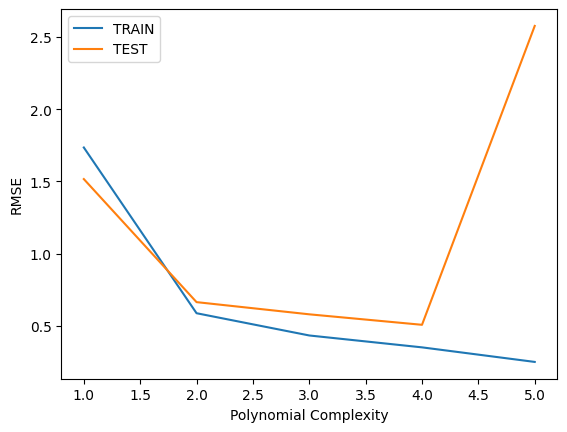

In [ ]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

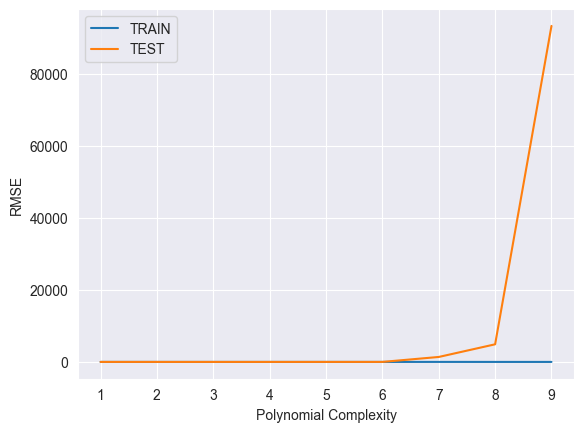

In [36]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

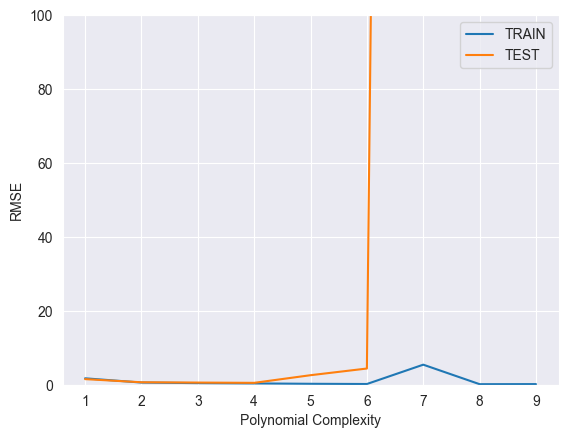

In [37]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

## Финальный выбор модели

Чтобы выбрать модель, необходимо сохранить две вещи: объект, создающий полиномиальные признаки, и саму модель. Дальнейшие шаги будут следующими:

1. Выбираем окончательные значения параметров, основываясь на тестовых метриках.
2. Повторно обучаем модель на всех данных.
3. Сохраняем объект Polynomial Converter.
4. Сохраняем модель.

Начнем поэтапно выбирать модель.

In [38]:
# На нашем графике видно, что мы могли бы выбрать и значение degree=4, однако
# безопаснее взять чуть меньшую степень сложности
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

### Сохраняем модель и объект converter



In [41]:
from joblib import dump, load

### **[Задание 7]**

Экспортируйте модель `final_model` и `final_poly_converter`. Результаты сохраните в файлы `sales_poly_model.joblib` и `poly_converter.joblib`.





In [42]:
dump(final_model, 'sales_poly_model.joblib')
dump(final_poly_converter, 'poly_converter.joblib')

['poly_converter.joblib']

## Внедрение модели и предсказания

### Предсказания на новых данных

Вспомните, что нам нужно **сконвертировать** новые входящие данные в полиномиальные данные, поскольку именно на таких данных мы обучали нашу модель. Мы можем загрузить ранее сохранённый объект converter и просто вызвать метод **`.transform()`** на новых данных, поскольку нам не нужно выполнять обучение на новых данных.

Попробуем ответить на следующий вопрос:
**В нашей следующей рекламной кампании мы планируем потратить 149k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах. Сколько единиц товара мы ожидаем продать в результате такой рекламы?**

### **[Задание 8]**

Экспортируйте модель `sales_poly_model.joblib` и `poly_converter.joblib` в переменные `loaded_poly` и `loaded_model`.





In [43]:
loaded_model = load('sales_poly_model.joblib')
loaded_model

LinearRegression()

In [44]:
loaded_poly = load('poly_converter.joblib')
loaded_poly

PolynomialFeatures(degree=3, include_bias=False)

Теперь протестируем наши загруженные модели:

In [45]:
campaign = [[149,22,12]]

In [46]:
campaign_poly = loaded_poly.transform(campaign)

/Library/Python/3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [47]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [48]:
final_model.predict(campaign_poly)

array([14.64501014])

# Регуляризация в SciKit-Learn

Ранее мы создали набор полиномиальных признаков и применили к ним линейную регрессию. Однако, чтобы улучшить модель, мы можем использовать **регуляризацию**.

Регуляризация направлена на минимизацию метрики "сумма квадратов остатков" (RSS, residual sum of squares) и "функции штрафа". Функция штрафа стремится "наказывать" модели с очень большими коэффициентами. Некоторые методы регуляризации приводят к тому, что некоторые незначимые признаки получают нулевые коэффициенты, то есть модель не будет их использовать.

Два метода регуляризации, которые мы рассмотрим — это гребневая регрессия (или ридж-регрессия, Ridge-regression) и регрессия лассо. Мы будем применять их вместе с полиномиальными признаками, так как регуляризация модели не так эффективна на исходном наборе признаков X.

## Загрузка данных и подготовительные шаги

In [49]:
df = pd.read_csv("Advertising.csv")
X = df.drop('sales',axis=1)
y = df['sales']

### Полиномиальная конвертация

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [51]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [52]:
poly_features = polynomial_converter.fit_transform(X)

### Разбиение на обучающий и тестовый наборы данных -  Train | Test Split

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

## Нормализация данных

В нашем датасете все признаки имеют одинаковый порядок величины (в $1000 долларов), однако это лишь везение - в других наборах данных величины могут быть разнопорядковыми. Поскольку математика регуляризации будет суммировать коэффициенты, важно стандартизировать признаки.

Подключим метод `StandardScaler` для нормализации данных

In [55]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# help(StandardScaler)

In [56]:
scaler = StandardScaler()

In [57]:
scaler.fit(X_train)

StandardScaler()

In [58]:
X_train = scaler.transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

## Гребневая регрессия (Ridge Regression)

В лонгриде мы разбирали гребневую регрессию, а теперь попробуем имплементировать ее. Для этого импортируем метод [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) из `linear_model`.

In [61]:
from sklearn.linear_model import Ridge

Для примера возьмем параметр α. Отметим что параметр α должен быть неотрицательным.

In [62]:
ridge_model = Ridge(alpha=10)

In [63]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [64]:
test_predictions = ridge_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [66]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

### **[Задание 9]**

Вычислите метрику MAE и RMSE для модели `test_predictions`.


Какова точность на обучающей выборке? (Мы будем использовать это позже для сравнения)

In [67]:
# Производительность на обучающем наборе
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.5288348183025325

### Выбираем значение alpha с помощью кросс-валидации

А как подбирать параметр `alpha`? Для этого мы воспользуемся моделью [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)

In [68]:
from sklearn.linear_model import RidgeCV

Можно вывести справку по модели:

In [ ]:
# help(RidgeCV)

Выбираем [способ](https://scikit-learn.org/stable/modules/model_evaluation.html) для оценки модели и [параметры](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) для метода

In [69]:
# Смотрим все варианты: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [70]:
# Чем больше значений alpha Вы укажете, тем дольше времени потребуется.
# К счастью наш набор данных достаточно маленький.
ridge_cv_model.fit(X_train,y_train)

RidgeCV(scoring='neg_mean_absolute_error')

Выведем значение `alpha`

In [71]:
ridge_cv_model.alpha_

0.1

Сделаем предсказание на модели и выведем loss-функции.

In [72]:
test_predictions = ridge_cv_model.predict(X_test)

In [73]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [74]:
MAE

8.664443957987068

In [75]:
RMSE

10.08352681043709

In [76]:
# Метрика MAE на обучающем наборе
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.30941321056394455

In [77]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])


-----

## Регрессия Лассо

Теперь перейдем к [`LassoCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) из `linear_model`. Работа с ним примерно идентична Ridge, а потому трудностей она не вызывает

In [78]:
from sklearn.linear_model import LassoCV

Информация по параметрам Lasso представлена в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html).

In [79]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

Запустим обучение модели на поиск параметров и выведем коэффициенты

In [80]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [81]:
lasso_cv_model.alpha_

0.4943070909225828

Сделаем предсказание на тестовой выборке и выведем значения метрик:

In [82]:
test_predictions = lasso_cv_model.predict(X_test)

In [83]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [84]:
MAE

5.540755761616547

In [85]:
RMSE

7.303318812843016

In [86]:
# Метрика MAE на обучающем наборе
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.6912807140820695

In [87]:
lasso_cv_model.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

## [Опционально] Elastic Net

Elastic Net сочетает в себе ридж-регрессию и лассо-регрессию, чтобы взять лучшее из обеих регуляризаций!

In [88]:
from sklearn.linear_model import ElasticNetCV

In [89]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [90]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [91]:
elastic_model.l1_ratio_

1.0

In [92]:
test_predictions = elastic_model.predict(X_test)

In [93]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [94]:
MAE

8.343321889341341

In [95]:
RMSE

9.803494264633578

In [96]:
# Метрика MAE на обучающем наборе
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.430758299047237

In [97]:
elastic_model.coef_

array([ 3.78993643,  0.89232919,  0.28765395, -1.01843566,  2.15516144,
       -0.3567547 , -0.271502  ,  0.09741081,  0.        , -1.05563151,
        0.2362506 ,  0.07980911,  1.26170778,  0.01464706,  0.00462336,
       -0.39986069,  0.        ,  0.        , -0.05343757])

-----
---